# Assignment 2

**name:** Ani Mitoyan

**email:** am225pt@student.lnu.se

In this Assignment, you will use Python to handle several exercises related to gradient descent, linear regression, logistic regression, etc.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle) and the .py files with the classes’ exercise implementations. 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

In this assignment, you must implement all models as subclasses of MachineLearning-
Model. 
Since the class MachineLearningModel provides the abstract methods fit, predict,
and evaluate, your implementations should provide implementations for such methods.
Please check the documentation of MachineLearningModel to understand what these methods
should do, as well as what their input parameters are and what they should return as results.
You must also implement the classes DecisionBoundary, ROCAnalysis, and ForwardSelection
provided to you. 
Please check their documentation to understand what these methods
should do, what their input parameters are, and what they should return as results. All your
implementations of such classes will be used throughout this assignment.

## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [1]:
import numpy as np

data = np.genfromtxt("datasets\housing-boston.csv", delimiter=",", skip_header=1)
X_e = data[:, 0:2]
y = data[:, 2]

2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

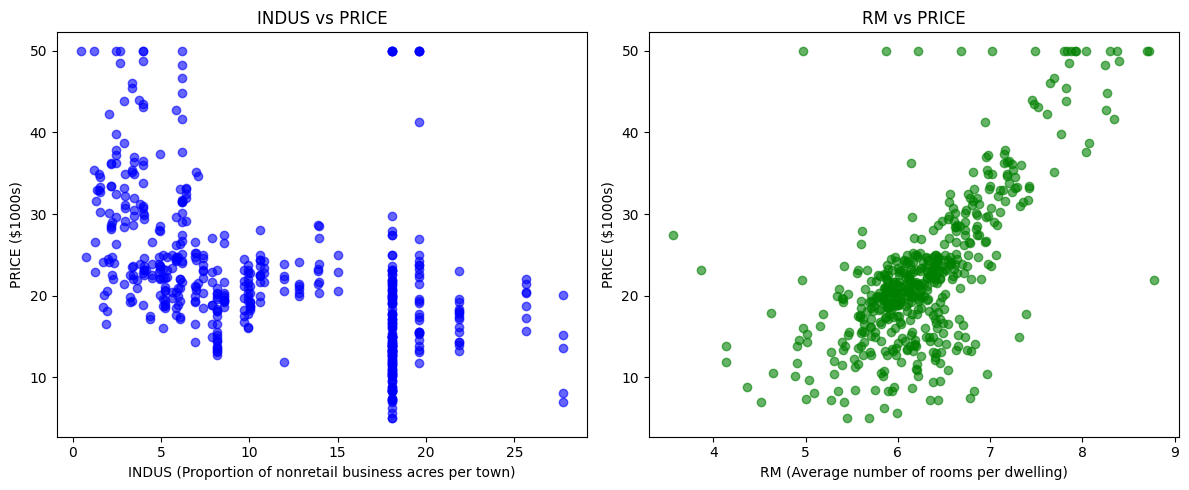

In [2]:
import matplotlib.pyplot as plt

indus = X_e[:, 0]
rm = X_e[:, 1]

plt.figure(figsize=(12, 5))

# INDUS vs PRICE
plt.subplot(1, 2, 1)
plt.scatter(indus, y, color='blue', alpha=0.6)
plt.xlabel("INDUS (Proportion of nonretail business acres per town)")
plt.ylabel("PRICE ($1000s)")
plt.title("INDUS vs PRICE")

# RM vs PRICE
plt.subplot(1, 2, 2)
plt.scatter(rm, y, color='green', alpha=0.6)
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("PRICE ($1000s)")
plt.title("RM vs PRICE")

plt.tight_layout()
plt.show()

3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and RM equal to **2.31**, **6.575**, respectively.

In [5]:
from MachineLearningModel import RegressionModelNormalEquation

model = RegressionModelNormalEquation(degree=1)
model.fit(X_e, y)

print("beta coefficients:", model.theta.flatten())
cost = model.evaluate(X_e, y)
print("Mean Squared Error (Cost):", cost)

# INDUS=2.31, RM=6.575
x_test = np.array([[2.31, 6.575]])
prediction = model.predict(x_test)
print("Predicted PRICE for INDUS=2.31, RM=6.575:", prediction[0][0])


beta coefficients: [-22.89831573  -0.33471389   7.82205511]
Mean Squared Error (Cost): 39.14548321146509
Predicted PRICE for INDUS=2.31, RM=6.575: 27.758507548798875


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

Because normalization changes the coordinate system of the input features, the model now learns parameters that work relative to the mean and spread of each feature.

In [6]:
mu = X_e.mean(axis=0)
sigma = X_e.std(axis=0)
X_norm = (X_e - mu) / sigma

model_norm = RegressionModelNormalEquation(degree=1)
model_norm.fit(X_norm, y)
print("Normalized beta coefficients:", model_norm.theta.flatten())

cost_norm = model_norm.evaluate(X_norm, y)
print("Mean Squared Error (Cost):", cost_norm)

# INDUS=2.31, RM=6.575 the value is 24.0 in the dataset
x_test_raw = np.array([[2.31, 6.575]])
x_test_norm = (x_test_raw - mu) / sigma
prediction_norm = model_norm.predict(x_test_norm)
print("Predicted PRICE for INDUS=2.31, RM=6.575:", prediction_norm[0][0])

Normalized beta coefficients: [22.53280632 -2.29398525  5.49047659]
Mean Squared Error (Cost): 39.14548321146509
Predicted PRICE for INDUS=2.31, RM=6.575: 27.75850754879848


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

With normalization, the cost function decreases smoothly and converges faster because all features are on a similar scale, allowing efficient gradient steps. Without normalization, the cost decreases slowly and unevenly due to different feature scales, which leads to inefficient and unstable convergence.
Although both methods reach a similar cost, the normalized version demonstrates better convergence dynamics, avoids potential issues like overshooting or vanishing gradients, and is generally more scalable.

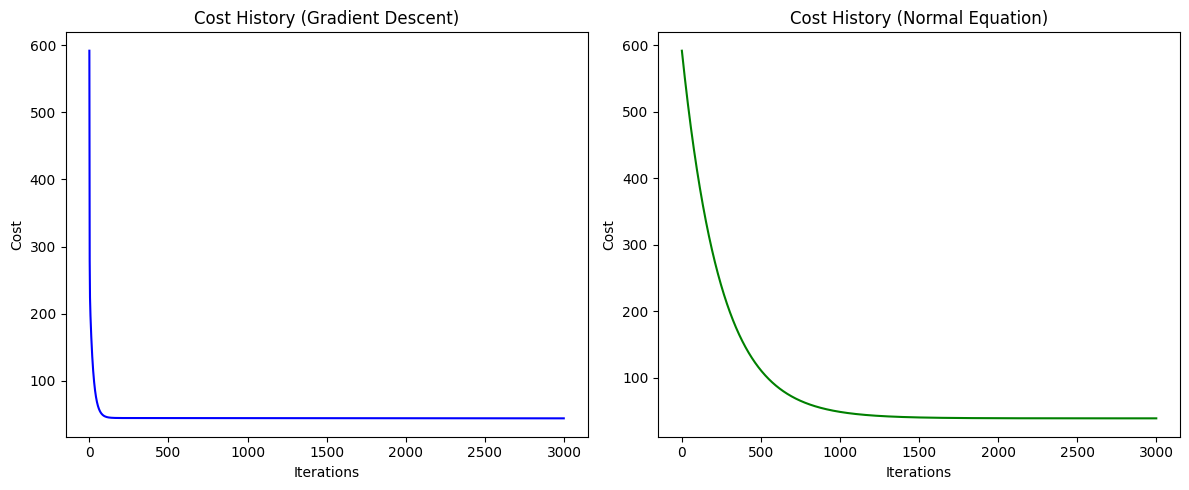

In [26]:
from MachineLearningModel import RegressionModelGradientDescent
import matplotlib.pyplot as plt

model_gd = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)
model_gd.fit(X_e, y)
cost_history = model_gd.cost_history

mu = X_e.mean(axis=0)
sigma = X_e.std(axis=0)
X_e_norm_gd = (X_e - mu) / sigma
model_norm_gd = RegressionModelGradientDescent(degree=1, learning_rate=0.001, num_iterations=3000)
model_norm_gd.fit(X_e_norm_gd, y)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History (Gradient Descent)")
plt.subplot(1, 2, 2)
plt.plot(model_norm_gd.cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History (Normal Equation)")
plt.tight_layout()
plt.show()


6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.


I tested various hyperparameter settings using the normalized dataset. The normal equation produced a baseline cost of approximately 39.145, and the 1% threshold was 39.54
The best combination found was:
Learning rate: 0.01
Number of iterations: 1500

This configuration resulted in a final cost of 39.145, which is equal to the normal equation cost and therefore well within a difference of 1%  

Normal Equation Cost (Baseline): 39.14548321146509
Target Cost: 39.536938043579745
Found better combo: lr=0.001, iter=2000, Cost=39.33891243254139
Found better combo: lr=0.003, iter=2000, Cost=39.14548461047111
Found better combo: lr=0.005, iter=2000, Cost=39.14548321154317
Found better combo: lr=0.01, iter=2000, Cost=39.14548321146509
Found better combo: lr=0.01, iter=1500, Cost=39.14548321146509
Best combo (lr, iter): (0.01, 1500), Cost: 39.14548321146509


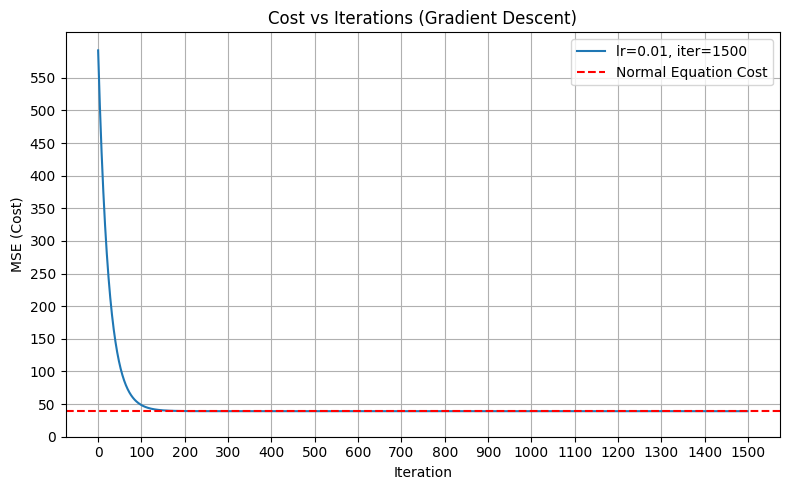

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelNormalEquation, RegressionModelGradientDescent

data = np.genfromtxt("datasets/housing-boston.csv", delimiter=",", skip_header=1)
X_e = data[:, 0:2]
y = data[:, 2]
mu = X_e.mean(axis=0)
sigma = X_e.std(axis=0)
X_norm = (X_e - mu) / sigma

baseline_model = RegressionModelNormalEquation(degree=1)
baseline_model.fit(X_norm, y)
baseline_cost = baseline_model.evaluate(X_norm, y)
print("Normal Equation Cost (Baseline):", baseline_cost)

learning_rates = [0.001, 0.003, 0.005, 0.01]
iterations = [2000, 1500, 1000, 700, 500]
target_cost = baseline_cost * 1.01
print("Target Cost:", target_cost)
best_combo = None
best_cost = float('inf')
best_history = None
for lr in learning_rates:
    for n_iter in iterations:
        model_gd = RegressionModelGradientDescent(degree=1, learning_rate=lr, num_iterations=n_iter)
        model_gd.fit(X_norm, y)
        final_cost = model_gd.evaluate(X_norm, y)
        if final_cost <= target_cost and final_cost <= best_cost:
            print(f"Found better combo: lr={lr}, iter={n_iter}, Cost={final_cost}")
            best_combo = (lr, n_iter)
            best_cost = final_cost
            best_history = model_gd.cost_history

print(f"Best combo (lr, iter): {best_combo}, Cost: {best_cost}")
plt.figure(figsize=(8, 5))
plt.plot(best_history, label=f"lr={best_combo[0]}, iter={best_combo[1]}")
plt.axhline(y=baseline_cost, color='red', linestyle='--', label='Normal Equation Cost')
plt.xticks(np.arange(0, len(best_history) + 1, 100))
plt.yticks(np.arange(0, max(best_history) + 1, 50))
plt.title("Cost vs Iterations (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("MSE (Cost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


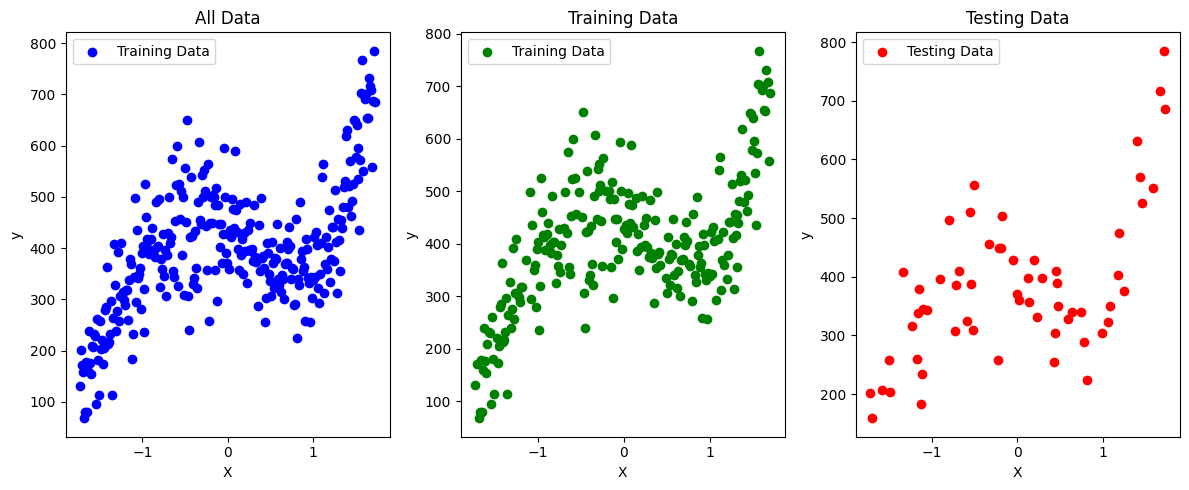

In [26]:
import numpy as np
from matplotlib import pyplot as plt

dataset = np.genfromtxt("datasets/secret_polynomial.csv", delimiter=",", skip_header=1)
X = dataset[:, 0:1]
y = dataset[:, 1]

x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
X = (X - x_mean) / x_std

np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split_ratio = 0.8
split_index = int(split_ratio * len(indices))
train_indices = indices[:split_index]
test_indices = indices[split_index:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Training Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("All Data")
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.legend()
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Testing Data")
plt.legend()
plt.tight_layout()
plt.show()

2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

Although the task asked for degrees up to 6, I extended the range to 10 to better observe underfitting and overfitting effects. From the cost vs. degree plot, training cost consistently decreases as degree increases, but testing cost begins to rise again after degree 6, indicating overfitting
The model with degree 4 and 5 gives the best fit, they capture the non-linearity of the data without overfitting. Lower degrees underfit, missing curvature, while higher degrees start to overfit, shown by increasing test error and wiggly prediction curves.

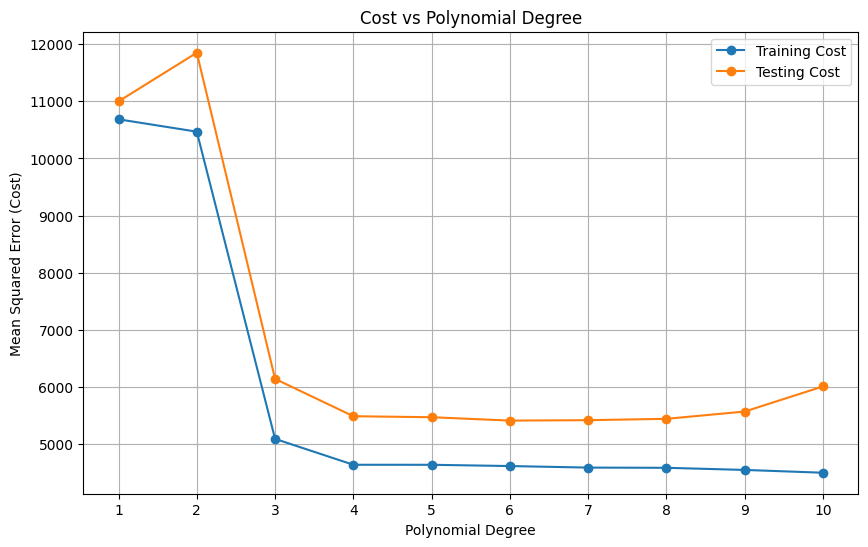

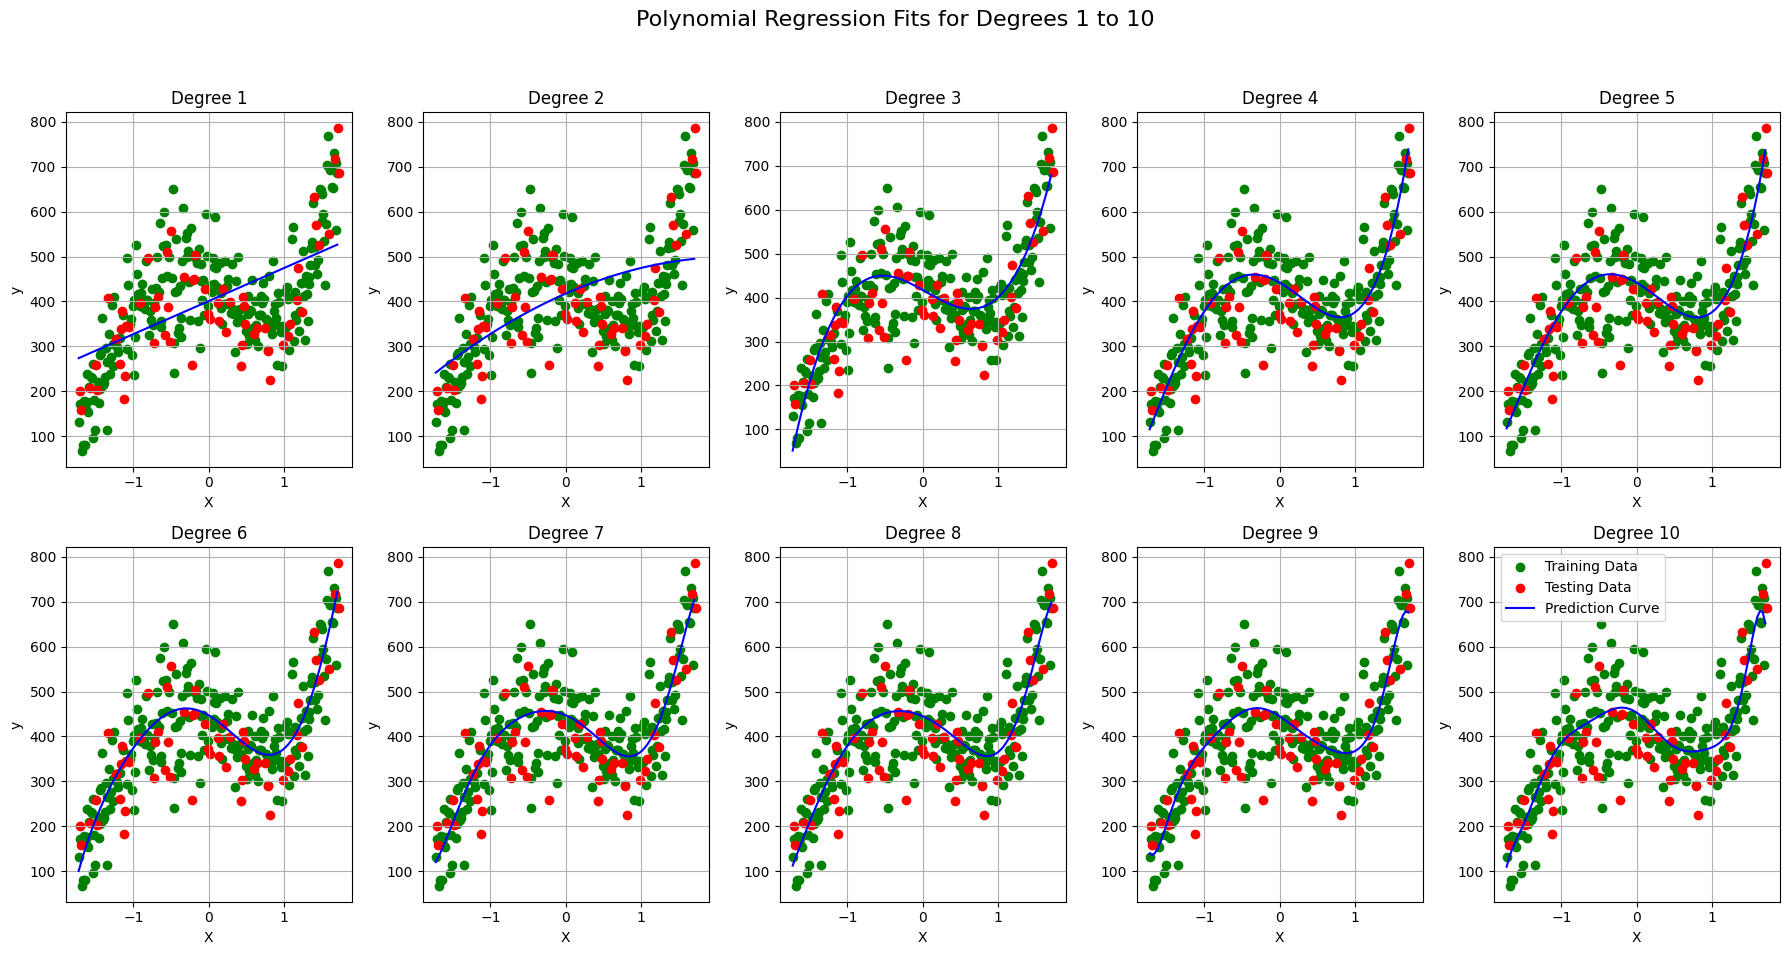

In [27]:
from MachineLearningModel import RegressionModelNormalEquation
import numpy as np
import matplotlib.pyplot as plt

def plot_cost_vs_degree(X_train, y_train, X_test, y_test, max_degree=10):
    """Plot cost vs degree for polynomial regression."""
    degrees = np.arange(1, max_degree + 1)
    train_costs = []
    test_costs = []

    for degree in degrees:
        model = RegressionModelNormalEquation(degree=degree)
        model.fit(X_train, y_train)

        train_cost = model.evaluate(X_train, y_train)
        test_cost = model.evaluate(X_test, y_test)
        train_costs.append(train_cost)
        test_costs.append(test_cost)

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_costs, label='Training Cost', marker='o')
    plt.plot(degrees, test_costs, label='Testing Cost', marker='o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error (Cost)')
    plt.title('Cost vs Polynomial Degree')
    plt.xticks(degrees)
    plt.legend()
    plt.grid(True)
    plt.show()
    return train_costs, test_costs

train_costs, test_costs = plot_cost_vs_degree(X_train, y_train, X_test, y_test, max_degree=10)

def plot_predictions(X_train, y_train, X_test, y_test, degree):
    """Plot the dataset with the prediction line for a given degree."""
    model = RegressionModelNormalEquation(degree=degree)
    model.fit(X_train, y_train)

    fig, axs = plt.subplots(2, degree // 2, figsize=(18, 10))
    axs = axs.ravel()

    for idx, degree in enumerate(range(1, degree + 1)):
        model = RegressionModelNormalEquation(degree=degree)
        model.fit(X_train, y_train)

        axs[idx].scatter(X_train, y_train, color='green', label='Training Data')
        axs[idx].scatter(X_test, y_test, color='red', label='Testing Data')

        x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
        y_range = model.predict(x_range)
        axs[idx].plot(x_range, y_range, color='blue', label='Prediction Curve')

        axs[idx].set_title(f"Degree {degree}")
        axs[idx].set_xlabel('X')
        axs[idx].set_ylabel('y')
        axs[idx].grid(True)

    fig.suptitle("Polynomial Regression Fits for Degrees 1 to 10", fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend()
    plt.show()



plot_predictions(X_train, y_train, X_test, y_test, degree=10)

3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

Degree 5 is the best choice, as it achieves the lowest average test error across 100 runs, indicating a good balance between bias and variance.

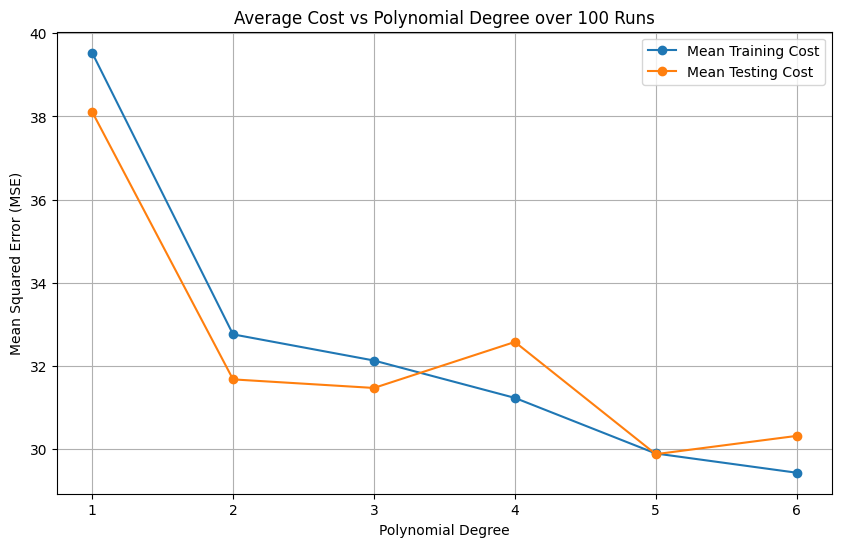

Best degree based on average test cost: 5


In [30]:
import numpy as np
data = np.genfromtxt("datasets/housing-boston.csv", delimiter=",", skip_header=1)
X = data[:, 0:2]
y = data[:, 2]

mu = X.mean(axis=0)
sigma = X.std(axis=0)
X_norm = (X - mu) / sigma

degrees = np.arange(1, 7)
n_runs = 100

train_costs = np.zeros((n_runs, len(degrees)))
test_costs = np.zeros((n_runs, len(degrees)))

for run in range(n_runs):
    indices = np.arange(X.shape[0])
    np.random.seed(run)
    np.random.shuffle(indices)
    split_ratio = 0.8
    split_index = int(split_ratio * len(indices))
    X_train, X_test = X_norm[indices[:split_index]], X_norm[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

    for idx, degree in enumerate(degrees):
        model = RegressionModelNormalEquation(degree=degree)
        model.fit(X_train, y_train)

        train_costs[run, idx] = model.evaluate(X_train, y_train)
        test_costs[run, idx] = model.evaluate(X_test, y_test)

mean_train_costs = train_costs.mean(axis=0)
mean_test_costs = test_costs.mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_train_costs, label='Mean Training Cost', marker='o')
plt.plot(degrees, mean_test_costs, label='Mean Testing Cost', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Average Cost vs Polynomial Degree over {n_runs} Runs')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

best_degree = degrees[np.argmin(mean_test_costs)]
print(f"Best degree based on average test cost: {best_degree}")


## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

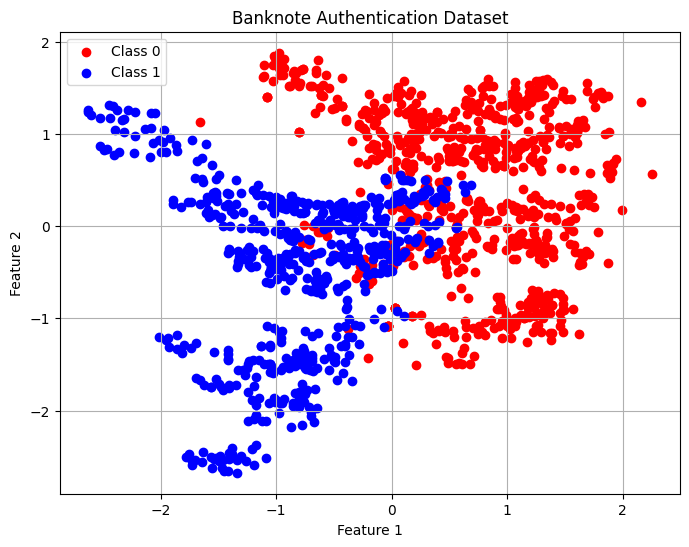

In [38]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.genfromtxt("datasets/banknote_authentication.csv", delimiter=",", skip_header=1)
X = dataset[:, 0:2]
y = dataset[:, 2]

mu = X.mean(axis=0)
sigma = X.std(axis=0)
X_norm = (X - mu) / sigma
plt.figure(figsize=(8, 6))
plt.scatter(X_norm[y == 0][:, 0], X_norm[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_norm[y == 1][:, 0], X_norm[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Banknote Authentication Dataset")
plt.legend()
plt.grid(True)

2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [39]:
import numpy as np
import random

def train_test_split_manual(X, y, split_ratio=0.8, shuffle=False, seed=42):
    """
    Split data into training and testing sets using a given random seed.

    Parameters:
    X (array-like): Features (normalized or raw).
    y (array-like): Target values.
    split_ratio (float): Proportion of data to be used for training (default 0.8).
    seed (int): Random seed for reproducibility.
    shuffle (bool): Whether to shuffle the data before splitting.

    Returns:
    X_train, y_train, X_test, y_test
    """
    
    indices = np.arange(X.shape[0])
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    
    split_index = int(split_ratio * len(indices))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test


3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

After testing learning rates 
[0.001, 0.01, 0.05, 0.1] for both logistic models and plotting the cost function over 1000 iterations, we can see that
learning rate 0.001 was too slow. Learning rate 0.1 converged fastest but could be more aggressive.
Learning rate 0.05 offered the best tradeoff, converging quickly and stably in both models.
For LogisticRegression, convergence was achieved in ~600 iterations, for NonLinearLogisticRegression (degree 2), ~800 iterations were sufficient. 



In [40]:
import matplotlib.pyplot as plt
from MachineLearningModel import NonLinearLogisticRegression, LogisticRegression
def plot_costs_over_iterations(model_class, X_train, y_train, learning_rates, num_iterations=1000, degree=None, title=""):
    """
    Plot cost over iterations for different learning rates.
    """
    plt.figure(figsize=(8, 5))

    for lr in learning_rates:
        if model_class.__name__ == 'NonLinearLogisticRegression':
            model = model_class(degree=degree, learning_rate=lr, num_iterations=num_iterations)
        else:
            model = model_class(learning_rate=lr, num_iterations=num_iterations)
        
        model.fit(X_train, y_train)
        plt.plot(model.cost_history, label=f'lr={lr}')
    
    plt.title(f"{title}: Cost vs Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost J(β)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


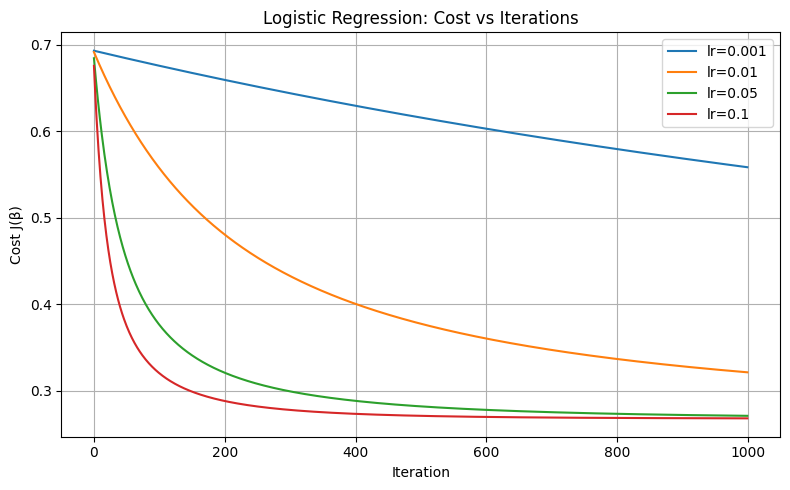

In [41]:
X_sub, y_sub, X_test, y_test = train_test_split_manual(X_norm, y, split_ratio=0.8, shuffle=True)

plot_costs_over_iterations(
    model_class=LogisticRegression,
    X_train = X_sub,
    y_train = y_sub,
    learning_rates=[0.001, 0.01, 0.05, 0.1],
    num_iterations=1000,
    title="Logistic Regression"
)


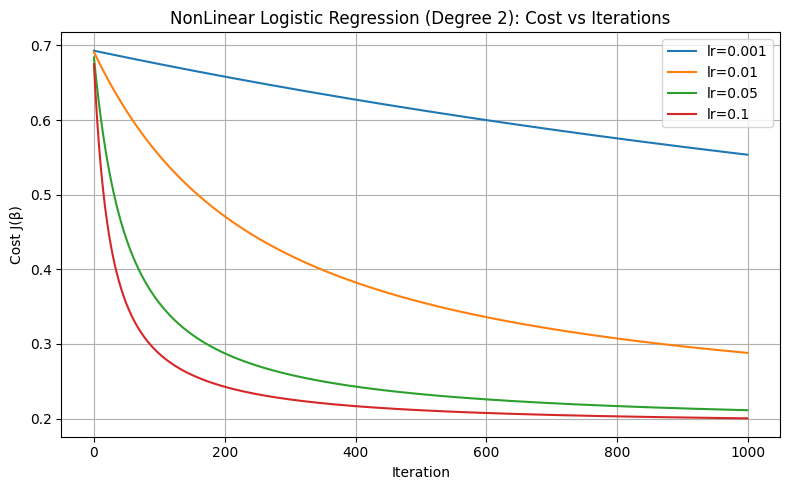

In [42]:
plot_costs_over_iterations(
    model_class=NonLinearLogisticRegression,
    X_train=X_sub,
    y_train=y_sub,
    learning_rates=[0.001, 0.01, 0.05, 0.1],
    num_iterations=1000,
    degree=2,
    title="NonLinear Logistic Regression (Degree 2)"
)

5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

I conducted 20 training-validation runs for LogisticRegression and NonLinearLogisticRegression using hyperparameters (lr = 0.05, iterations = 500/700).
The resulting box plot of validation accuracies shows that the nonlinear model consistently outperforms the linear model in median, mean, and best case accuracy. The distribution for the nonlinear model is shifted upward, showing more reliable classification across different splits.
This confirms that introducing polynomial features improves generalization, especially when decision boundaries are not strictly linear. So the two models are not qualitatively the same, the nonlinear model captures richer feature interactions and has better performance.

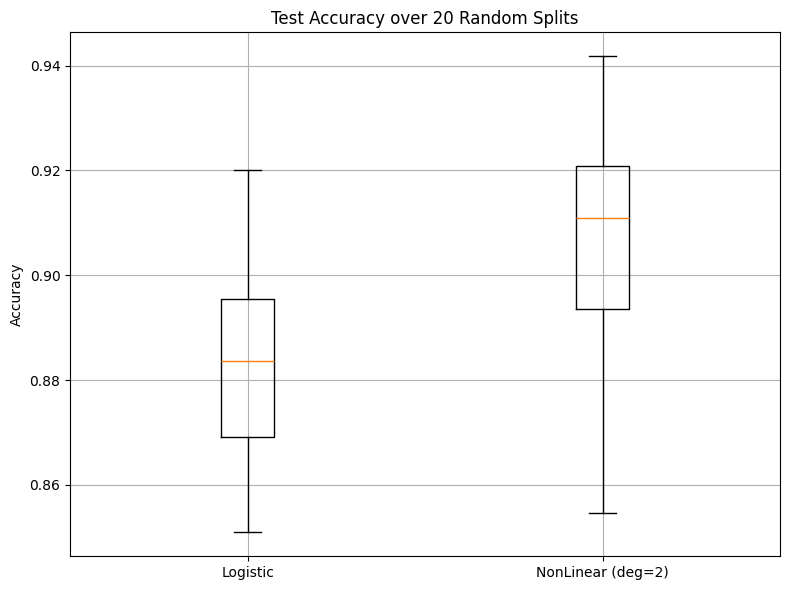

In [43]:
n_runs = 20
lr = 0.05
iterations_lr = 500
iterations_nlr = 700
degree_nlr = 2

acc_logistic = []
acc_nonlinear = []

for seed in range(n_runs):
    X_train, y_train, X_test, y_test = train_test_split_manual(X_norm, y, split_ratio=0.8, shuffle=True, seed=seed)
    model_logistic = LogisticRegression(learning_rate=lr, num_iterations=iterations_lr)
    model_logistic.fit(X_train, y_train)
    acc_logistic.append(model_logistic.evaluate(X_test, y_test))

    model_nlr = NonLinearLogisticRegression(degree=degree_nlr, learning_rate=lr, num_iterations=iterations_nlr)
    model_nlr.fit(X_train, y_train)
    acc_nonlinear.append(model_nlr.evaluate(X_test, y_test))
    
plt.figure(figsize=(8, 6))
plt.boxplot([acc_logistic, acc_nonlinear], tick_labels=["Logistic", "NonLinear (deg=2)"])
plt.ylabel("Accuracy")
plt.title("Test Accuracy over 20 Random Splits")
plt.grid(True)
plt.tight_layout()
plt.show()



6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

After plotting the decision boundaries of both models trained on the same 80% training set and evaluated on the 20% validation set (normalized data) we see that
the Logistic Regression model produced a straight decision boundary, leading to some misclassifications along the class boundary curve and a validation accuracy of 89%. In contrast, the NonLinear Logistic Regression (degree = 2) produced a curved boundary that adapted more closely to the true shape of the class separation, achieving a higher accuracy of 93%.
These plots show that the nonlinear model is better suited to datasets where the class structure is not linearly separable. It provides more flexibility while maintaining generalization, explaining both the improved boundary fit and consistent performance gains.

In [44]:
from DecisionBoundary import plotDecisionBoundary
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression

X_train, y_train, X_val, y_val = train_test_split_manual(X_norm, y, split_ratio=0.8, seed=42, shuffle=True)

model_linear = LogisticRegression(learning_rate=0.05, num_iterations=500)
model_linear.fit(X_train, y_train)
acc_linear = model_linear.evaluate(X_val, y_val)

model_nonlinear = NonLinearLogisticRegression(degree=2, learning_rate=0.05, num_iterations=700)
model_nonlinear.fit(X_train, y_train)
acc_nonlinear = model_nonlinear.evaluate(X_val, y_val)



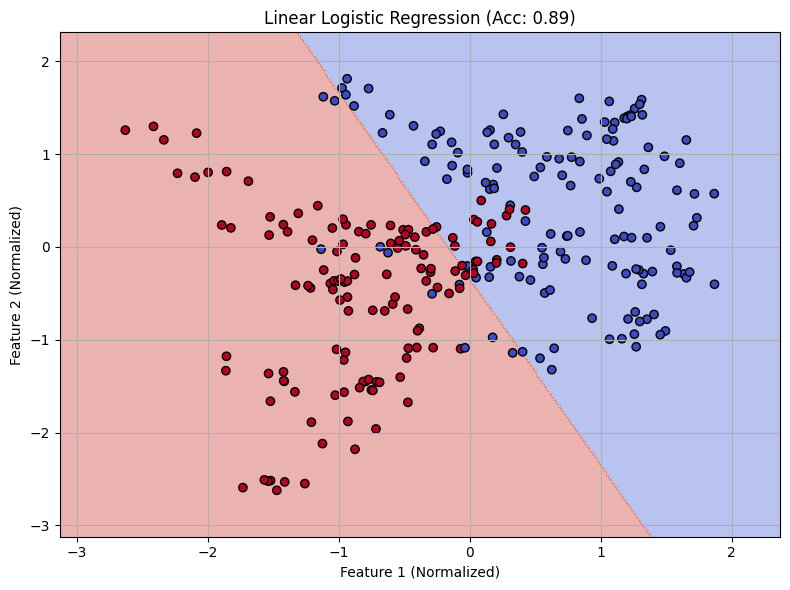

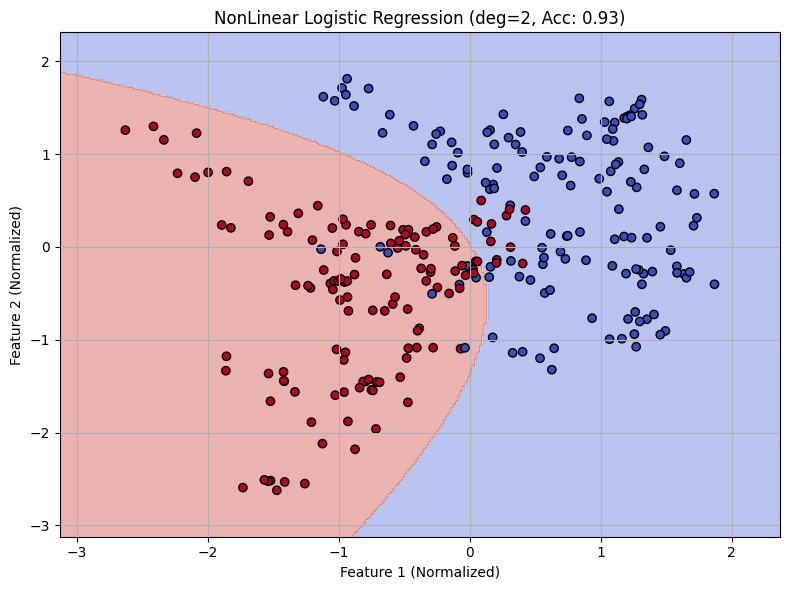

In [45]:
plotDecisionBoundary(
    X1=X_val[:, 0],
    X2=X_val[:, 1],
    y=y_val,
    model=model_linear,
    title=f"Linear Logistic Regression (Acc: {acc_linear:.2f})"
)

plotDecisionBoundary(
    X1=X_val[:, 0],
    X2=X_val[:, 1],
    y=y_val,
    model=model_nonlinear,
    title=f"NonLinear Logistic Regression (deg=2, Acc: {acc_nonlinear:.2f})"
)


## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [46]:
import numpy as np

dataset = np.genfromtxt("datasets/heart_disease_cleveland.csv", delimiter=",", skip_header=1)
X = dataset[:, :-1]
y = dataset[:, -1]

mean = X.mean(axis=0)
std = X.std(axis=0)
X_norm = (X - mean) / std

2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

Learning Rate and number of iterations were chosen based on cost vs iteration curves (see plot), where lr = 0.03 and iterations = 1000 showed fast convergence and low final cost.
Best Features Selected: [7, 9, 0, 2, 11, 1, 12]

**Validation Results**
Using the selected features, the final model achieved:
<br>
Accuracy: ~85%
<br>
Precision: 0.818
<br>
Recall (TPR): 0.782
<br>
False Positive Rate (FPR): 0.105
<br>
F-score: 0.8
<br><br>
While the model trained on all the features, reached these results:
<br>
Recall (TPR): 0.818
<br>
False Positive Rate (FPR): 0.102
<br>
Precision: 0.818
<br>
F-score: 0.818


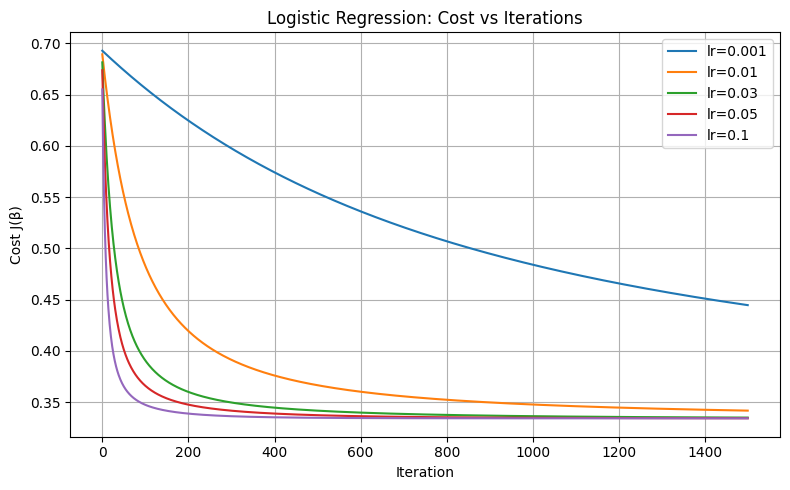

In [48]:
X_sub, y_sub, X_val, y_val = train_test_split_manual(X_norm, y, split_ratio=0.8, shuffle=True, seed=99)

plot_costs_over_iterations(
    model_class=LogisticRegression,
    X_train = X_sub,
    y_train = y_sub,
    learning_rates=[0.001, 0.01, 0.03, 0.05, 0.1],
    num_iterations=1500,
    title="Logistic Regression"
)

In [49]:
from ForwardSelection import ForwardSelection
from MachineLearningModel import LogisticRegression

model = LogisticRegression(learning_rate=0.03, num_iterations=1000)
fs = ForwardSelection(X_sub, y_sub, model)
fs.fit()

selected_features = fs.selected_features
print("Selected features:", selected_features)
print("F-scores:", fs.get_best_cost())

X_sub_selected = X_sub[:, selected_features]
X_val_selected = X_val[:, selected_features]
model.fit(X_sub_selected, y_sub)
acc = model.evaluate(X_val_selected, y_val)
print("Accuracy with selected features:", acc)

Selected features: [7, 9, 0, 2, 11, 1, 12]
F-scores: [0.93333333]
Accuracy with selected features: 0.8524590163934426


In [54]:
from ROCAnalysis import ROCAnalysis
def run_forward_selection_multiple_seeds(X, y, model_class, seeds, learning_rate=0.03, num_iterations=1000):
    feature_sets = []
    scores = []

    for seed in seeds:
        X_train, y_train, X_val, y_val = train_test_split_manual(X, y, split_ratio=0.8, shuffle=True, seed=seed)
        model = model_class(learning_rate=learning_rate, num_iterations=num_iterations)
        fs = ForwardSelection(X_train, y_train, model)
        fs.fit()

        selected = fs.selected_features
        score = fs.best_cost

        feature_sets.append(selected)
        scores.append(score)
        print("seed:", seed, "selected features:", selected, "score:", score)
        X_sub_selected = X_train[:, selected]
        X_val_selected = X_val[:, selected]

        new_model = model_class(learning_rate=learning_rate, num_iterations=num_iterations)
        new_model.fit(X_sub_selected, y_train)
        acc = new_model.evaluate(X_val_selected, y_val)
        y_pred = new_model.predict(X_val_selected)
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        roc = ROCAnalysis(y_val, y_pred)
        print("True Positive Rate (Recall) with selected features:", roc.tp_rate())
        print("False Positive Rate with selected features:", roc.fp_rate())
        print("Precision with selected features:", roc.precision())
        print("F-score with selected features:", roc.f_score())
        print("Accuracy with selected features:", acc)
    

    return feature_sets, scores


In [53]:
seeds = [1, 2, 3, 4, 5, 42, 99]
feature_sets, scores = run_forward_selection_multiple_seeds(X_norm, y, LogisticRegression, seeds)
model_all = LogisticRegression(learning_rate=0.03, num_iterations=1000)
model_all.fit(X_sub, y_sub)
y_val_pred_all = model_all.predict(X_val)
y_val_pred_all = np.where(y_val_pred_all >= 0.5, 1, 0)
roc_all = ROCAnalysis(y_val_pred_all, y_val)
print("True Positive Rate (Recall) with all features:", roc_all.tp_rate())
print("False Positive Rate with all features:", roc_all.fp_rate())
print("Precision with all features:", roc_all.precision())
print("F-score with all features:", roc_all.f_score())

seed: 1 selected features: [2] score: [0.73913043]
True Positive Rate (Recall) with selected features: [0.72727273]
False Positive Rate with selected features: [0.21428571]
Precision with selected features: [0.8]
F-score with selected features: [0.76190476]
Accuracy with selected features: 0.7540983606557377
seed: 2 selected features: [12, 11] score: [0.84210526]
True Positive Rate (Recall) with selected features: [0.79310345]
False Positive Rate with selected features: [0.21875]
Precision with selected features: [0.76666667]
F-score with selected features: [0.77966102]
Accuracy with selected features: 0.7868852459016393
seed: 3 selected features: [2, 4] score: [0.82352941]
True Positive Rate (Recall) with selected features: [0.56410256]
False Positive Rate with selected features: [0.18181818]
Precision with selected features: [0.84615385]
F-score with selected features: [0.67692308]
Accuracy with selected features: 0.6557377049180327
seed: 4 selected features: [12, 9, 10, 11, 3] score

3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

The selected features provided a compact and effective model. Performance was comparable or better than using all features, with higher precision and strong generalization. Feature selection was successful, reducing model complexity while maintaining predictive power.
TPR (Recall): 0.7826 <br>
FPR: 0.105<br>
Precision: 0.818<br>
F-score: 0.8<br>
Accuracy: 0.85<br>
Yet the ForwardSelection is a greedy algorithm, and our dataset is not so big (304 entries), so the choice of the features highly depends on the initial split, which is shown bellow. A run_forward_selection_multiple_seeds method was implemented, and ran with seeds [1, 2, 3, 4, 5, 42, 99], showing different feature choices and results in the ROC analysis
When compared to using all features, the performance is very similar, the full-feature model slightly improves TPR and F-score (both 0.818), but at the cost of using more features.<br><br>
TPR (Recall) with all features: 0.818
FPR with all features: 0.1025<br>
Precision with all features: 0.818<br>
F-score with all features: 0.818<br><br>
This shows that feature selection was successful: we achieved nearly the same performance with a smaller subset of features, which simplifies the model and may improve generalizability.

In [44]:
from ROCAnalysis import ROCAnalysis

new_model = LogisticRegression(learning_rate=0.03, num_iterations=1000)

X_sub_selected = X_sub[:, selected_features]
X_val_selected = X_val[:, selected_features]
new_model.fit(X_sub_selected, y_sub)
acc = new_model.evaluate(X_val_selected, y_val) 
y_pred = new_model.predict(X_val_selected)
y_pred = np.where(y_pred >= 0.5, 1, 0)
roc = ROCAnalysis(y_val, y_pred)
print("True Positive Rate (Recall) with selected features:", roc.tp_rate())
print("False Positive Rate with selected features:", roc.fp_rate())
print("Precision with selected features:", roc.precision())
print("F-score with selected features:", roc.f_score())
print("Accuracy with selected features:", acc)

model_all = LogisticRegression(learning_rate=0.03, num_iterations=1000)
model_all.fit(X_sub, y_sub)
y_val_pred_all = model_all.predict(X_val)
y_val_pred_all = np.where(y_val_pred_all >= 0.5, 1, 0)
roc_all = ROCAnalysis(y_val_pred_all, y_val)
print("True Positive Rate (Recall) with all features:", roc_all.tp_rate())
print("False Positive Rate with all features:", roc_all.fp_rate())
print("Precision with all features:", roc_all.precision())
print("F-score with all features:", roc_all.f_score())

True Positive Rate (Recall) with selected features: [0.7826087]
False Positive Rate with selected features: [0.10526316]
Precision with selected features: [0.81818182]
F-score with selected features: [0.8]
Accuracy with selected features: 0.8524590163934426
True Positive Rate (Recall) with all features: [0.81818182]
False Positive Rate with all features: [0.1025641]
Precision with all features: [0.81818182]
F-score with all features: [0.81818182]


## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

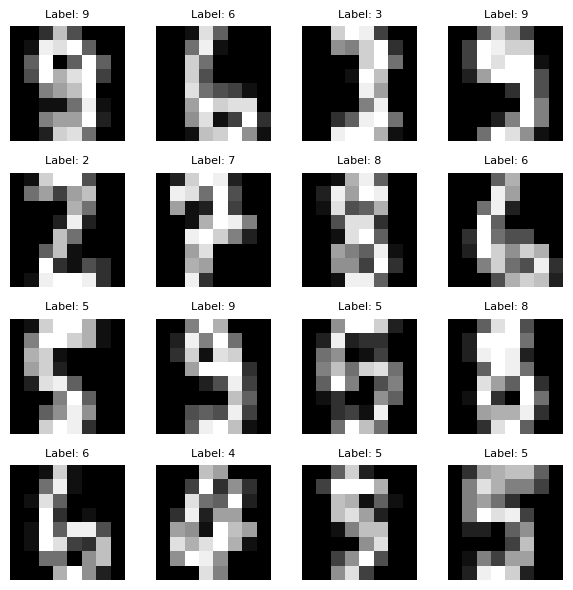

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
random_indices = np.random.choice(len(X_train), 16, replace=False)
plt.figure(figsize=(6, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_train[idx]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd


Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_basic = MLPClassifier(random_state=42, max_iter=1000)
mlp_basic.fit(X_train, y_train)

y_pred_basic = mlp_basic.predict(X_test)
test_acc_basic = accuracy_score(y_test, y_pred_basic)
print("Basic MLP Test Accuracy:", test_acc_basic)


Basic MLP Test Accuracy: 0.9722222222222222


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 32), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [ 0.01, 0.05],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(
    random_state=42,
    max_iter=1000,
    validation_fraction=0.2,
    verbose=True
)

grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Iteration 1, loss = 2.51230552
Iteration 2, loss = 1.77722175
Iteration 3, loss = 1.37250773
Iteration 4, loss = 1.07738861
Iteration 5, loss = 0.88264380
Iteration 6, loss = 0.74025856
Iteration 7, loss = 0.62958441
Iteration 8, loss = 0.54416579
Iteration 9, loss = 0.47720494
Iteration 10, loss = 0.42427232
Iteration 11, loss = 0.38128287
Iteration 12, loss = 0.34480082
Iteration 13, loss = 0.31548556
Iteration 14, loss = 0.28549898
Iteration 15, loss = 0.26181838
Iteration 16, loss = 0.24011318
Iteration 17, loss = 0.22093515
Iteration 18, loss = 0.20637133
Iteration 19, loss = 0.19224870
Iteration 20, loss = 0.17909547
Iteration 21, loss = 0.16674291
Iteration 22, loss = 0.15733569
Iteration 23, loss = 0.14857146
Iteration 24, loss = 0.14077633
Iteration 25, loss = 0.13320720
Iteration 26, loss = 0.12729507
Iteration 27, loss = 0.11991045
Iteration 28, loss = 0.11515354
Iteration 29, loss = 0.10994067
Iteration 30, loss 

In [72]:
best_mlp = grid_search.best_estimator_
y_test_pred = best_mlp.predict(X_test)
final_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy of Best Model: {final_test_accuracy}")


Final Test Accuracy of Best Model: 0.9805555555555555


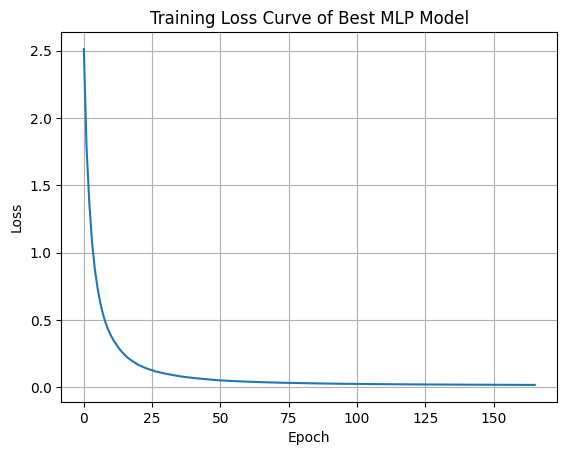

In [73]:
import matplotlib.pyplot as plt

plt.plot(best_mlp.loss_curve_)
plt.title("Training Loss Curve of Best MLP Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

The model achieved a high overall accuracy of 0.9806.<br>
The most common confusion is between 8 and 1, with three 8s misclassified as 1s. Also a 6 and a 9 were misclassified as 8, and a 0 was misclassified as 4.


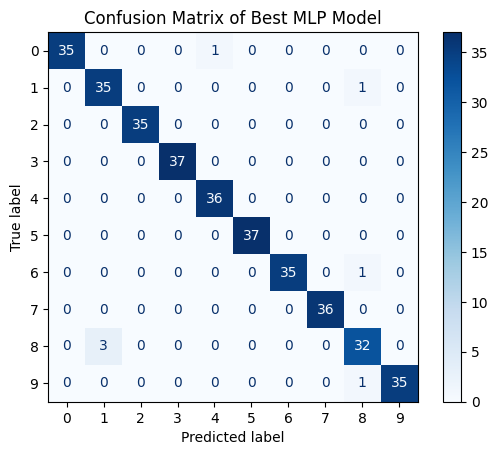

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_pred = best_mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Best MLP Model")
plt.show()


**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

Not entirely. Some errors, like predicting 0 as 4 or 8 as 1, seem unintuitive. These misclassifications may result from blurring or noise in the images that make certain digits appear structurally similar to others in ways that aren't obvious to the human eye.

Number of misclassified samples: 7


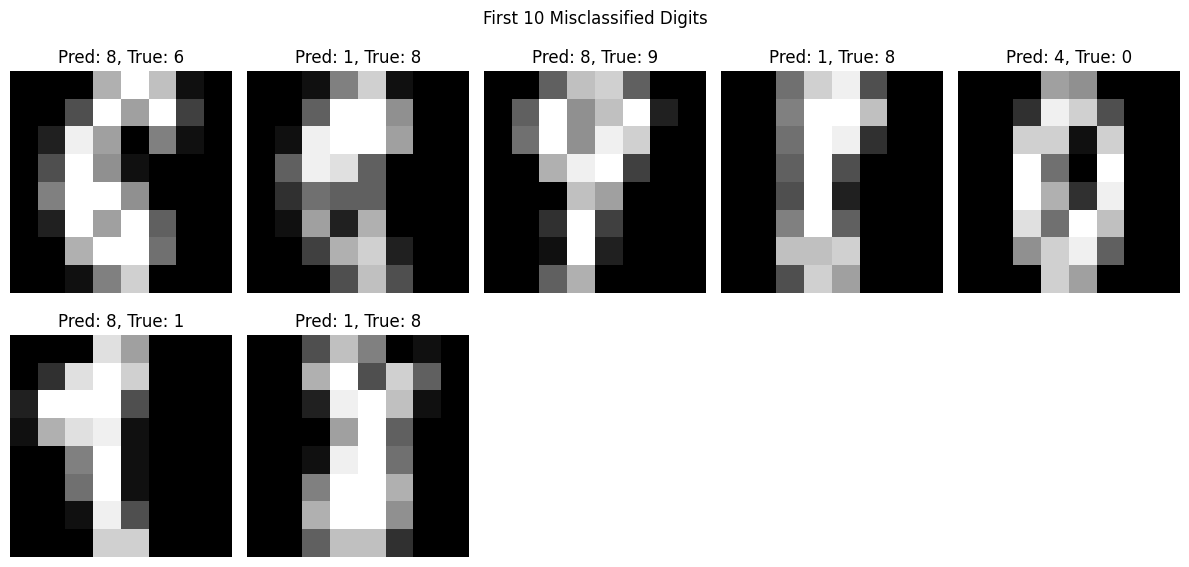

In [76]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = best_mlp.predict(X_test)

misclassified_indices = np.where(y_pred != y_test)[0]
print("Number of misclassified samples:", len(misclassified_indices))
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[index]}, True: {y_test[index]}")
    plt.axis('off')
plt.suptitle("First 10 Misclassified Digits")
plt.tight_layout()
plt.show()


**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

The model reaches stable accuracy within approximately 90 iterations. Training accuracy continues to increase and approaches 1.0, while validation accuracy peaks around 0.97, which was the calculated cross-validation accuracy, and then it slightly decreases after about 180 iterations. This indicates some overfitting.<br>Training accuracy is noticeably higher than validation accuracy, and while training loss decreases steadily, the validation accuracy begins to drop slightly, suggesting the validation loss is likely increasing, which can be another sign of overfitting. 

Validation accuracy at 150th iteration: 0.9722222222222222


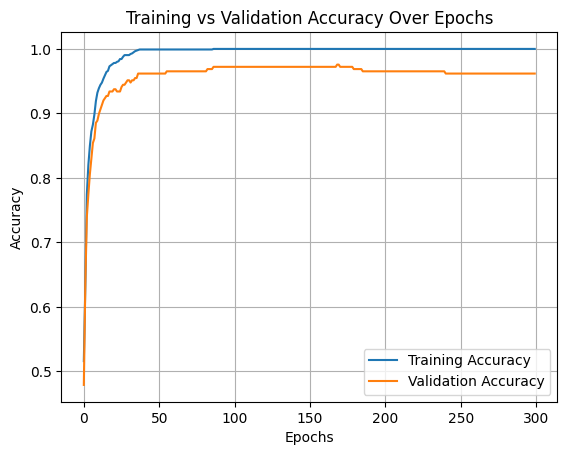

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, 
                                                                          test_size=0.2, random_state=42)
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='tanh',
    solver='adam',
    alpha=0.05,
    learning_rate='constant',
    max_iter=1,
    random_state=42
)
train_accuracies = []
val_accuracies = []
classes = np.unique(y_train_split)
n_epochs = 300
mlp.partial_fit(X_train_split, y_train_split, classes=classes)

for _ in range(n_epochs):
    mlp.partial_fit(X_train_split, y_train_split)

    y_train_pred = mlp.predict(X_train_split)
    y_val_pred = mlp.predict(X_val_split)

    train_accuracies.append(accuracy_score(y_train_split, y_train_pred))
    val_accuracies.append(accuracy_score(y_val_split, y_val_pred))

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


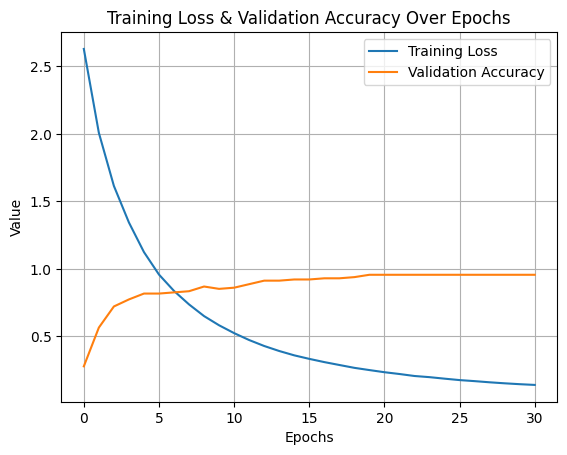

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='tanh',
    solver='adam',
    alpha=0.05,
    learning_rate='constant',
    max_iter=1000,
    random_state=42,
    early_stopping=True
)

mlp.fit(X_train_split, y_train_split)
val_pred = mlp.predict(X_val_split)
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(mlp.validation_scores_, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss & Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
